In [2]:
import pandas as pd

# Define file paths
input_file_path = "C:/Users/User/Desktop/Elio's File/CNAM/ESC- 115/Part 2 – Data Cleaning and Manipulation/Digital Performance Data.xlsx"
#  Output_file_path is specified each time : we have 3
# Output_file_path_1 : for the Merged Data ( combining sheet 1 and sheet 2)
# Output_file_path_2 : for the Merged Cleaned Slipted Data ( Merged Data + Spliting "campaign" + Cleaned)
# Output_file_path_3 : for the Final Data to visualize it ( Digital Performance data - Elio Bou serhal)

In [12]:
#################################################################################################
### QUESTION 1-1: Write a commented Python code to read data from the provided files 
### QUETION 1-2: Join the two raw data files in “Digital Performance Data” by identifying 
#                  the join type and column to unify them into one dataset
#################################################################################################



##### ANSWER : Question 1-1: READ THE 2 DATA SETS
# Step 1:Import 1st Data sheet: Raw Data 1
# Step 2:Import 2nd Data Sheet : Raw Data
##### ANSWER : Question 1-1: READ THE 2 DATA SETS
# Read the data from the Excel file for the first sheet
df1 = pd.read_excel(input_file_path, sheet_name="Raw Data 1")
print("\nFirst DataFrame (df1):")
print(df1.head())

# Read the data from the Excel file for the second sheet
df2 = pd.read_excel(input_file_path, sheet_name="Raw Data")
print("\nSecond DataFrame (df2):")
print(df2.head())



### ANSWER : Question 1-2: JOIN THE 2 DATA SETS
# step 1:Merge the two tables based on "Date" and "Campaign" columns using "Outer join" to select them all.
# step 2: Check the Merged data set (Remove Duplicates and work with the cleaned merged new data)
# step 3: Save the merged dataframe to a new Excel file
##### ANSWER : Question 1-2: JOIN THE 2 DATA SETS
# Merge the two tables based on "Date" and "Campaign" columns using "Outer join"
merged_df = pd.merge(df1, df2, on=["Date", "Campaign"], how="outer")

# Drop duplicate rows based on all columns
merged_df.drop_duplicates(inplace=True)

# Reset the index after dropping duplicates
merged_df.reset_index(drop=True, inplace=True)
print("Merged DataFrame without duplicates:")
print(merged_df.head())

# Save the merged dataframe to a new Excel file
output_file_path_2 = "C:/Users/User/Desktop/Elio's File/CNAM/ESC- 115/Part 2 – Data Cleaning and Manipulation/Merged Data.xlsx"
merged_df.to_excel(output_file_path_2, index=False)
print(f"Cleaned data exported to {output_file_path_2}")




First DataFrame (df1):
        Date                                           Campaign  Spends  \
0 2021-12-30  Search_Apple Search_Apple App Store_KSA_Conver...    1366   
1 2021-09-03       Search_Apple Search_KSA_Conversion_Hair Care    1393   
2 2021-08-13       Search_Apple Search_KSA_Conversion_Hair Care    1668   
3 2021-09-04  Search_Apple Search_Apple App Store_KSA_Conver...    1419   
4 2021-12-31  Search_Apple Search_Apple App Store_KSA_Conver...    1254   

   Impressions  Clicks  
0        40264    2076  
1        30542    1603  
2        36618    1812  
3        27956    1551  
4        34343    1800  

Second DataFrame (df2):
        Date                                           Campaign  Installs  \
0 2021-12-30  Search_Apple Search_Apple App Store_KSA_Conver...     690.0   
1 2021-09-03       Search_Apple Search_KSA_Conversion_Hair Care     679.0   
2 2021-08-13       Search_Apple Search_KSA_Conversion_Hair Care     618.0   
3 2021-09-04  Search_Apple Search_Apple Ap

In [ ]:
#################################################################################################
### QUESTION 2: Advise on a simple quality assurance method to demonstrate the validity of the joined dataset. 
# Step 1: Check for missing values in the Merged Data (for rows)
# Step 2: Check for missing Columns in the Merged Data (for columns)
# Step 3: Check for type and Uniquness in the Merged Data (for rows)
# Step 4: Check for type and Uniquness in the Merged Data (for columns)
#################################################################################################

##### ANSWER : Question 2: Simple quality assurance method
# Check for missing values in the Merged Data #
null_values = merged_df.isnull().sum()
if null_values.any():
    print("Null values found in the merged dataset:")
    print(null_values)
else:
    print("No null values found in the merged dataset.")

# Check for missing columns in the Merged Data
expected_columns = ['Date', 'Campaign', 'Installs', 'Sessions', 'Sign-Ups', 'Spends', 'Impressions', 'Clicks']
missing_columns = [col for col in expected_columns if col not in merged_df.columns]
if missing_columns:
    print("Missing columns in the merged dataset:", missing_columns)
else:
    print("All expected columns are present in the merged dataset.")

# Check for duplicate rows in the Merged Data
duplicate_rows = merged_df.duplicated().sum()
if duplicate_rows:
    print("Duplicate rows found in the merged dataset:", duplicate_rows)
else:
    print("No duplicate rows found in the merged dataset.")

# Check data types and unique values for each column
for col in merged_df.columns: 
    print("Column:", col)
    print("Data type:", merged_df[col].dtype)
    print("Unique values:", merged_df[col].unique())
    print()




In [14]:
###########################################################################################################
# QUESTION 3: Create six new columns, each representing a dimension available in the taxonomy. Use the 
#             split method to extract the dimensions from the appropriate column.
# Step 1: Create six new columns by splitting the "Campaign" column Define a function to split and pad/truncate the results
# Step 2: Apply the function to the 'Campaign' column
# Step 3: Assign the split columns back to the original dataframe
# Step 4: Drop the original 'Campaign' column
# Step 5: Save the updated DataFrame to a new Excel file #



##### ANSWER : Question 3: Create six new columns by splitting the "Campaign" column
# Define a function to split and pad/truncate the results #
def split_and_adjust(campaign):
    parts = campaign.split('_')
    if len(parts) == 6:
        return parts
    elif len(parts) < 6:
        return parts + [None] * (6 - len(parts))
    else:
        return parts[:6]

# Apply the function to the 'Campaign' column
split_columns = merged_df['Campaign'].apply(split_and_adjust)
split_df = pd.DataFrame(split_columns.tolist(), columns=['Channel', 'Platform', 'Destination', 'Market', 'Objective', 'ProductType'])

# Assign the split columns back to the original dataframe
merged_df[['Channel', 'Platform', 'Destination', 'Market', 'Objective', 'ProductType']] = split_df

# Drop the original 'Campaign' column
merged_df.drop(columns=['Campaign'], inplace=True)

# Display the updated dataframe
print("Updated DataFrame with split 'Campaign' column:")
print(merged_df.head())

# Save the updated DataFrame to a new Excel file
output_file_path_3 = "C:/Users/User/Desktop/Elio's File/CNAM/ESC- 115/Part 2 – Data Cleaning and Manipulation/Merged_Cleaned_Splited Data.xlsx"
merged_df.to_excel(output_file_path_3, index=False)
print(f"Cleaned data exported to {output_file_path_3}")




Updated DataFrame with split 'Campaign' column:
        Date  Spends  Impressions  Clicks  Installs  Sessions  Sign-Ups  \
0 2021-12-30    1366        40264    2076     690.0       NaN        30   
1 2021-12-30    1366        40264    2076       2.0       NaN         0   
2 2021-12-30      60         4326      16     690.0       NaN        30   
3 2021-12-30      60         4326      16       2.0       NaN         0   
4 2021-09-03    1393        30542    1603     679.0       NaN        26   

  Channel      Platform      Destination      Market   Objective  \
0  Search  Apple Search  Apple App Store         KSA  Conversion   
1  Search  Apple Search  Apple App Store         KSA  Conversion   
2  Search  Apple Search  Apple App Store         KSA  Conversion   
3  Search  Apple Search  Apple App Store         KSA  Conversion   
4  Search  Apple Search              KSA  Conversion   Hair Care   

     ProductType  
0  Personal Care  
1  Personal Care  
2  Personal Care  
3  Personal Care

In [16]:
############################################################################################################
# QUESTION 4:  Extend the script to create two addiƟonal columns, "Start Date" and "End Date," that capture 
#              the start and end dates for each campaign based on the relevant columns in the dataset. 
# Step 1: Converting the values in the 'Date' column to datetime format
# Step 2: Group by 'Campaigns' and aggregate to find the sum of "clicks, Installs" and mean of "sign-ups"
# Step 3: Calculate the Cost per Mile percentage (CPM)
############################################################################################################


##### ANSWER : Question 4: Create 'Start Date' and 'End Date' columns
# Step 1: Converting the values in the 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Step 2: Group by 'Market', 'Channel', 'Platform', 'Destination', 'Objective', 'ProductType' and aggregate
df_aggregated = merged_df.groupby(['Market', 'Channel', 'Platform', 'Destination', 'Objective', 'ProductType']).agg({
    'Date': ['min', 'max'],
    'Spends': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Installs': 'sum',
    'Sign-Ups': 'mean'
}).reset_index()

# Step 3: Calculate the Cost per Mile (CPM)
df_aggregated['CPM'] = (df_aggregated[('Spends', 'sum')] / df_aggregated[('Impressions', 'sum')]) * 1000

# Step 4: Flatten the MultiIndex columns
df_aggregated.columns = ['Market', 'Channel', 'Platform', 'Destination', 'Objective', 'ProductType', 'Start Date', 'End Date', 'Total Spends', 'Total Impressions', 'Total Clicks', 'Total Installs', 'Average Sign-Ups', 'CPM']

# Display the aggregated dataframe
print("Aggregated DataFrame with 'Start Date' and 'End Date' columns:")
print(df_aggregated.head())

# Save the aggregated DataFrame to a new Excel file
output_file_path_4 = "C:/Users/User/Desktop/Elio's File/CNAM/ESC- 115/Part 2 – Data Cleaning and Manipulation/Merged_Cleaned_Splited_Aggregated Data.xlsx"
df_aggregated.to_excel(output_file_path_4, index=False)
print(f"Aggregated data exported to {output_file_path_4}")


Aggregated DataFrame with 'Start Date' and 'End Date' columns:
       Market     Channel         Platform Destination        Objective  \
0  Conversion  Google Ads          Website       Egypt  Hair CareSearch   
1  Conversion    Snapchat  Apple App Store      Social        Skin Care   
2       Egypt      Search       Google Ads     Website       Conversion   
3       Egypt      Search       Google Ads     Website       Conversion   
4       Egypt      Social         Facebook     Website        Awareness   

     ProductType Start Date   End Date  Total Spends  Total Impressions  \
0                2021-07-07 2021-12-31         10636            1175571   
1         Kuwait 2021-07-02 2021-10-09          2210            1788696   
2  Personal Care 2021-07-02 2021-12-28          8325            1088231   
3      Skin Care 2021-07-01 2021-12-30          7368             773821   
4      Hair Care 2021-07-11 2021-07-31            61             105222   

   Total Clicks  Total Installs  Av

In [22]:
############################################################################################################
###############################################################################################################
# QUESTION 6: Save the file as CSV under the following name “Cleaned Digital Performance Data – {Your Name}”
###############################################################################################################
### ANSWER : Saving the cleaned Merged data 
output_file_path_5 = "C:/Users/User/Desktop/Elio's File/CNAM/ESC- 115/Part 2 – Data Cleaning and Manipulation/Cleaned Digital Performance Data – Elio Bou Serhal.xlsx"
df_aggregated.to_excel(output_file_path_5,index=False)
print(f"Aggregated data exported to {output_file_path_5}")

Aggregated data exported to C:/Users/User/Desktop/Elio's File/CNAM/ESC- 115/Part 2 – Data Cleaning and Manipulation/Cleaned Digital Performance Data – Elio Bou Serhal.xlsx


C:\Users\User\AppData\Local\Temp\ipykernel_18364\1174887053.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_18364\1174887053.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_18364\1174887053.py:30: SettingWithCopyWarning: 
A

Channel Metrics for 'Social' and 'Search':
  Channel       CTR  Conversion Rate        CPM  CPI  Average Sign-Ups
0  Search  2.535914        13.662052  27.882085  inf          8.298421
1  Social  1.354537         0.881569   1.950970  inf          0.205569


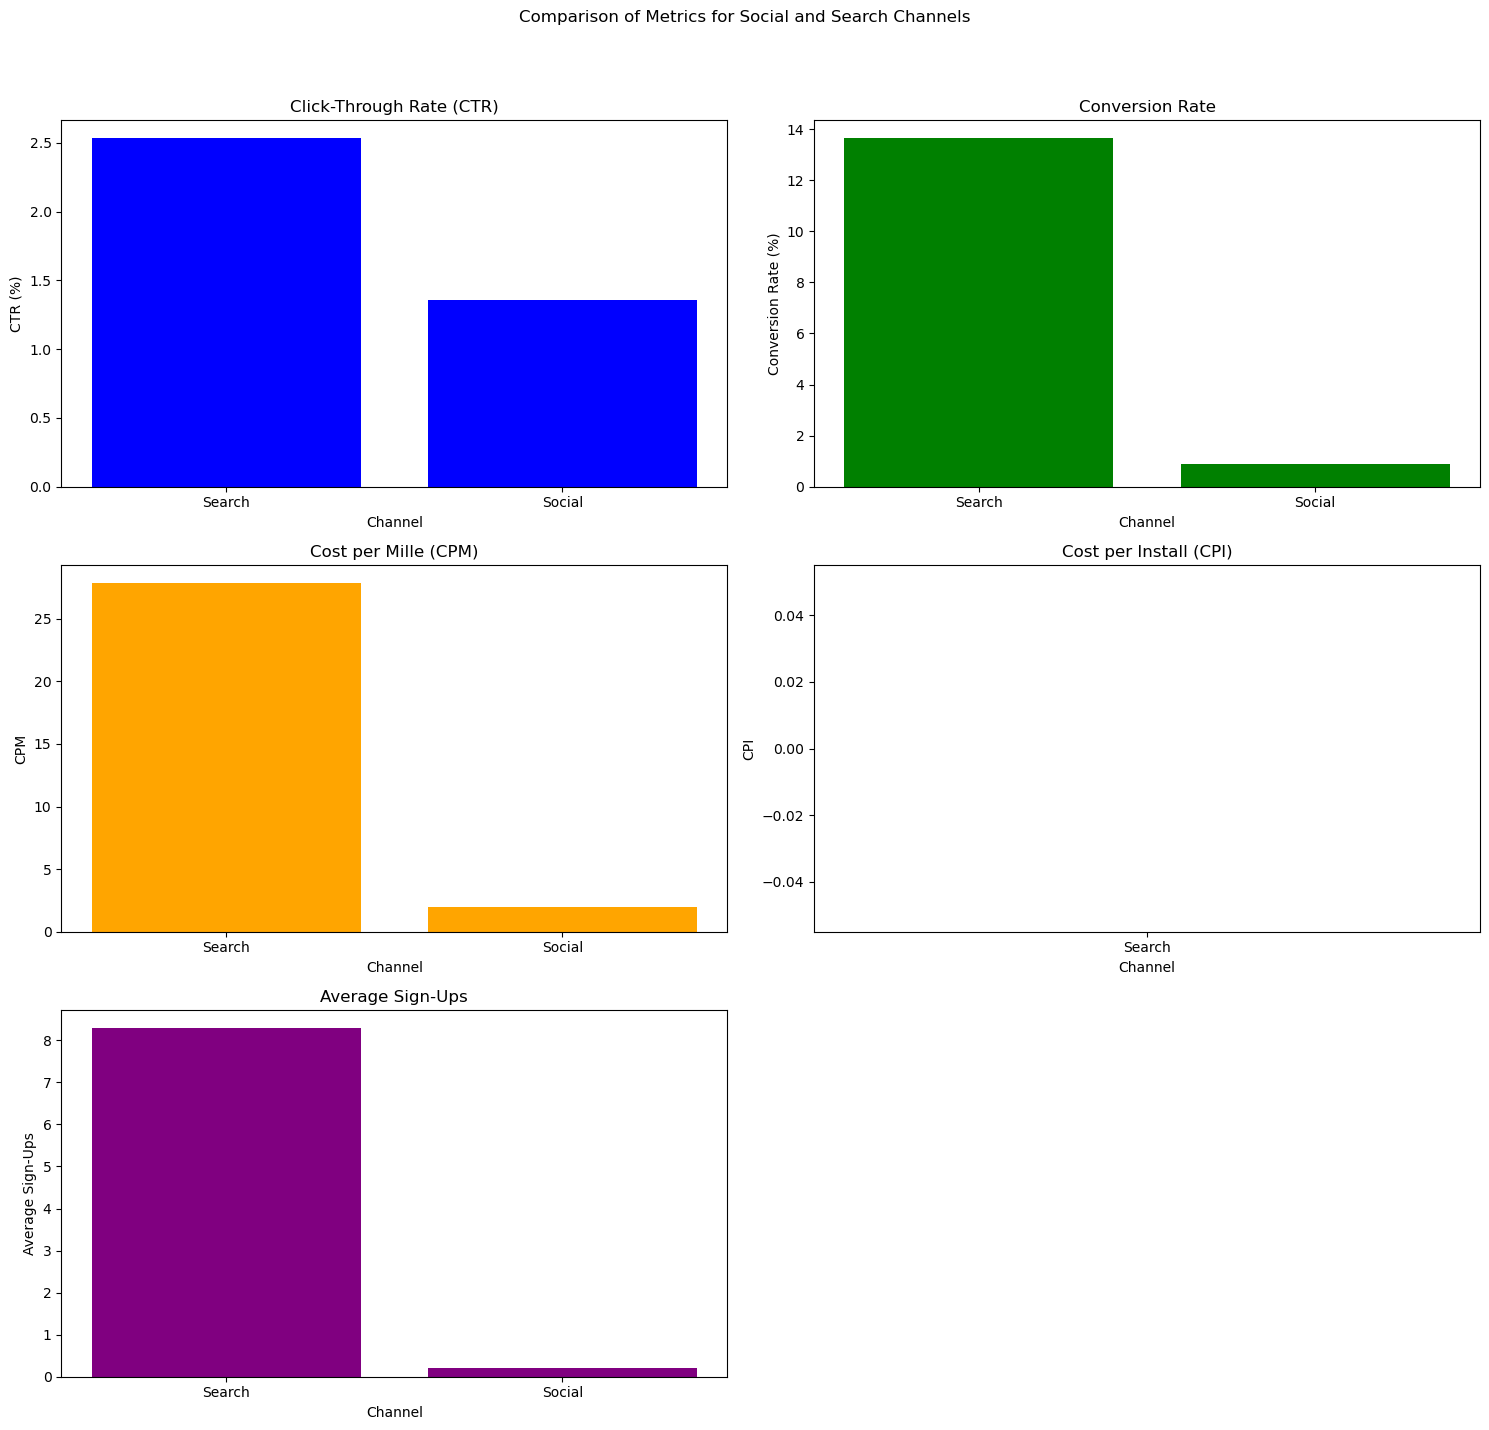

Channel metrics exported to C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Channel_Metrics_Social_Search.xlsx


In [26]:
############################################################################################################
###############################################################################################################
# QUESTION 7-1: Calculate the Mesure Metrics to test the Hypothesis :
###############################################################################################################

# Hypotheis 1: "Channel Effevtiveness"
# --> H1: Social Media Channels (Snapchat, Tiktok, Twitter) are more effective in driving conversion than Search channels ( Apple App Store, Apple Search, Facebook, Google Ads)
# --> H2: Search Channels are more effective in drinving conversion than Social Media channels.

# Hypothesis 2: "Platform Engagement"
# --> Campaigns run on Apple App Store result in higher metric measures than campaigns run on all the other platforms (Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter)
# --> Campaigns run on Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter result in higher metric measures than campaigns run on Apple App Store

# Hypothesis 3: " "








import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated data from the saved file
input_file_path = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Merged_Cleaned_Splited_Aggregated Data.xlsx"
df = pd.read_excel(input_file_path)

# Filter the data to include only "Social" and "Search" channels
filtered_df = df[df['Channel'].isin(['Social', 'Search'])]

# Calculate KPIs
filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
filtered_df['CPM'] = (filtered_df['Total Spends'] / filtered_df['Total Impressions']) * 1000
filtered_df['CPI'] = filtered_df['Total Spends'] / filtered_df['Total Installs']

# Group by Channel and calculate mean KPIs
channel_metrics = filtered_df.groupby('Channel').agg({
    'CTR': 'mean',
    'Conversion Rate': 'mean',
    'CPM': 'mean',
    'CPI': 'mean',
    'Average Sign-Ups': 'mean'
}).reset_index()

print("Channel Metrics for 'Social' and 'Search':")
print(channel_metrics)

# Visualize the metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Comparison of Metrics for Social and Search Channels')

# Plot CTR
axes[0, 0].bar(channel_metrics['Channel'], channel_metrics['CTR'], color='blue')
axes[0, 0].set_title('Click-Through Rate (CTR)')
axes[0, 0].set_xlabel('Channel')
axes[0, 0].set_ylabel('CTR (%)')

# Plot Conversion Rate
axes[0, 1].bar(channel_metrics['Channel'], channel_metrics['Conversion Rate'], color='green')
axes[0, 1].set_title('Conversion Rate')
axes[0, 1].set_xlabel('Channel')
axes[0, 1].set_ylabel('Conversion Rate (%)')

# Plot CPM
axes[1, 0].bar(channel_metrics['Channel'], channel_metrics['CPM'], color='orange')
axes[1, 0].set_title('Cost per Mille (CPM)')
axes[1, 0].set_xlabel('Channel')
axes[1, 0].set_ylabel('CPM')

# Plot CPI
axes[1, 1].bar(channel_metrics['Channel'], channel_metrics['CPI'], color='red')
axes[1, 1].set_title('Cost per Install (CPI)')
axes[1, 1].set_xlabel('Channel')
axes[1, 1].set_ylabel('CPI')

# Plot Average Sign-Ups
axes[2, 0].bar(channel_metrics['Channel'], channel_metrics['Average Sign-Ups'], color='purple')
axes[2, 0].set_title('Average Sign-Ups')
axes[2, 0].set_xlabel('Channel')
axes[2, 0].set_ylabel('Average Sign-Ups')

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the channel metrics to a new Excel file
output_file_path_6 = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Channel_Metrics_Social_Search.xlsx"
channel_metrics.to_excel(output_file_path_6, index=False)
print(f"Channel metrics exported to {output_file_path_6}")


C:\Users\User\AppData\Local\Temp\ipykernel_18364\2889955152.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_18364\2889955152.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_18364\2889955152.py:31: SettingWithCopyWarning: 
A

Platform Metrics:
          Platform       CTR  Conversion Rate        CPM        CPI  \
0  Apple App Store  1.043945         0.444492   1.235537  26.626506   
1     Apple Search  2.707512        32.447374  34.269116   3.935246   
2         Facebook  1.552649         2.302164   2.079192        inf   
3       Google Ads  2.411115         0.000000  23.236971        inf   
4         Snapchat  0.656647         0.493361   1.481956        inf   
5           TikTok  2.280935         0.195174   2.372105        inf   
6          Twitter  0.688748         0.000000   1.841874        inf   

   Average Sign-Ups  
0          0.098592  
1          4.432673  
2          0.187618  
3         11.109873  
4          0.382809  
5          0.065700  
6          0.148148  


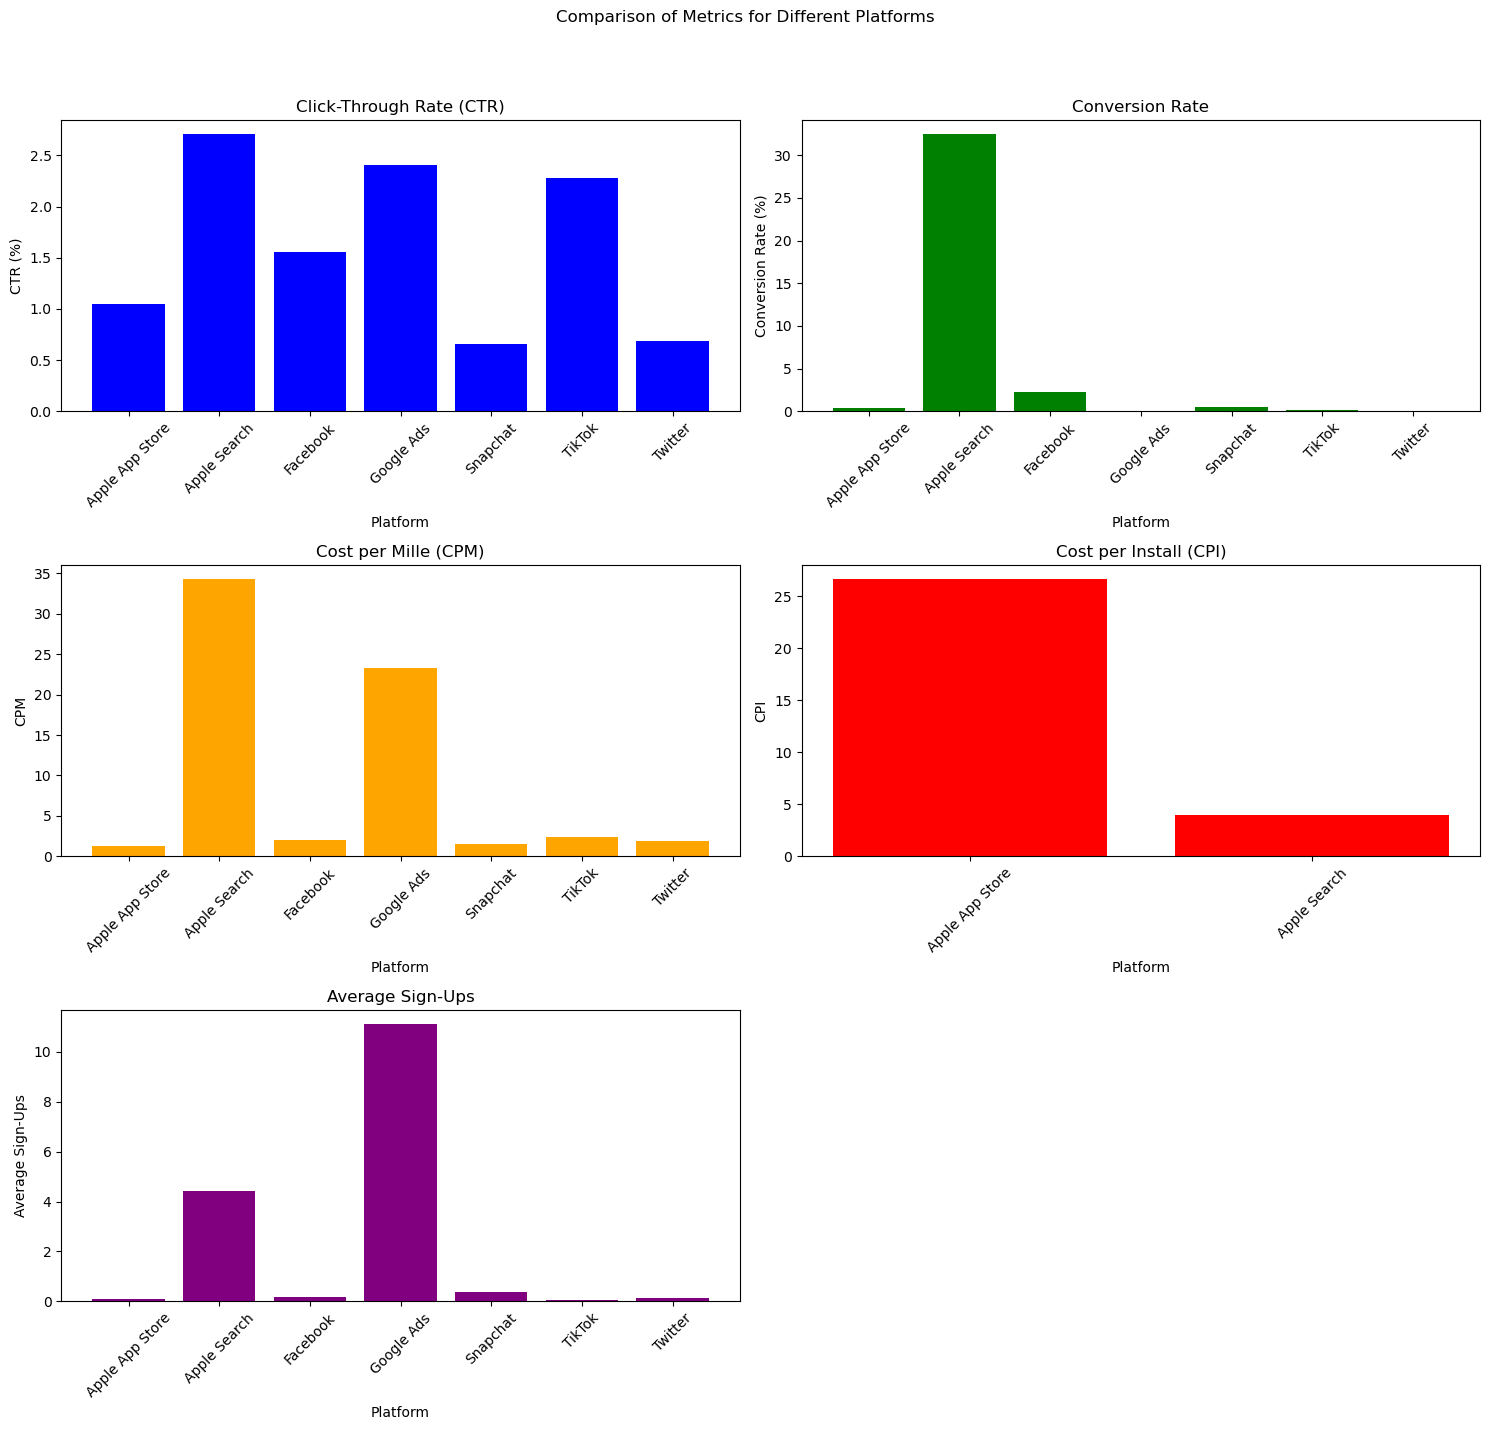

Platform metrics exported to C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Platform_Metrics.xlsx


In [28]:
############################################################################################################
###############################################################################################################
# QUESTION 7-2: Calculate the Mesure Metrics to test the Hypothesis :
###############################################################################################################

# Hypotheis 1: "Channel Effevtiveness"
# --> H1: Social Media Channels (Snapchat, Tiktok, Twitter) are more effective in driving conversion than Search channels ( Apple App Store, Apple Search, Facebook, Google Ads)
# --> H2: Search Channels are more effective in drinving conversion than Social Media channels.

# Hypothesis 2: "Platform Engagement"
# --> Campaigns run on Apple App Store result in higher metric measures than campaigns run on all the other platforms (Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter)
# --> Campaigns run on Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter result in higher metric measures than campaigns run on Apple App Store




import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated data from the saved file
input_file_path = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Merged_Cleaned_Splited_Aggregated Data.xlsx"
df = pd.read_excel(input_file_path)

# Filter the data to include only the 7 platforms
platforms = ['Apple App Store', 'Apple Search', 'Facebook', 'Google Ads', 'Snapchat', 'TikTok', 'Twitter']
filtered_df = df[df['Platform'].isin(platforms)]

# Calculate KPIs
filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
filtered_df['CPM'] = (filtered_df['Total Spends'] / filtered_df['Total Impressions']) * 1000
filtered_df['CPI'] = filtered_df['Total Spends'] / filtered_df['Total Installs']

# Group by Platform and calculate mean KPIs
platform_metrics = filtered_df.groupby('Platform').agg({
    'CTR': 'mean',
    'Conversion Rate': 'mean',
    'CPM': 'mean',
    'CPI': 'mean',
    'Average Sign-Ups': 'mean'
}).reset_index()

print("Platform Metrics:")
print(platform_metrics)

# Visualize the metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Comparison of Metrics for Different Platforms')

# Plot CTR
axes[0, 0].bar(platform_metrics['Platform'], platform_metrics['CTR'], color='blue')
axes[0, 0].set_title('Click-Through Rate (CTR)')
axes[0, 0].set_xlabel('Platform')
axes[0, 0].set_ylabel('CTR (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Conversion Rate
axes[0, 1].bar(platform_metrics['Platform'], platform_metrics['Conversion Rate'], color='green')
axes[0, 1].set_title('Conversion Rate')
axes[0, 1].set_xlabel('Platform')
axes[0, 1].set_ylabel('Conversion Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot CPM
axes[1, 0].bar(platform_metrics['Platform'], platform_metrics['CPM'], color='orange')
axes[1, 0].set_title('Cost per Mille (CPM)')
axes[1, 0].set_xlabel('Platform')
axes[1, 0].set_ylabel('CPM')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot CPI
axes[1, 1].bar(platform_metrics['Platform'], platform_metrics['CPI'], color='red')
axes[1, 1].set_title('Cost per Install (CPI)')
axes[1, 1].set_xlabel('Platform')
axes[1, 1].set_ylabel('CPI')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot Average Sign-Ups
axes[2, 0].bar(platform_metrics['Platform'], platform_metrics['Average Sign-Ups'], color='purple')
axes[2, 0].set_title('Average Sign-Ups')
axes[2, 0].set_xlabel('Platform')
axes[2, 0].set_ylabel('Average Sign-Ups')
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the platform metrics to a new Excel file
output_file_path_7 = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Platform_Metrics.xlsx"
platform_metrics.to_excel(output_file_path_7, index=False)
print(f"Platform metrics exported to {output_file_path_7}")


Unique values in 'Market' before filtering:
['Conversion' 'Egypt' 'Google Play Store' 'KSA' 'Kuwait' 'UAE' 'Website']
Unique values in 'Market' after filtering:
['EGYPT' 'KSA' 'KUWAIT' 'UAE']
Market Metrics:
   Market       CTR  Conversion Rate       CPM  CPI  Average Sign-Ups
0   EGYPT  3.204061         0.000000  3.772532  inf          1.116667
1     KSA  1.039115         2.978153  4.384658  inf          2.109848
2  KUWAIT  1.103288         4.426392  8.786947  inf          0.208315
3     UAE  2.390001         3.307315  8.637141  inf          1.276213


C:\Users\User\AppData\Local\Temp\ipykernel_16564\1382486133.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_16564\1382486133.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_16564\1382486133.py:47: SettingWithCopyWarning: 
A

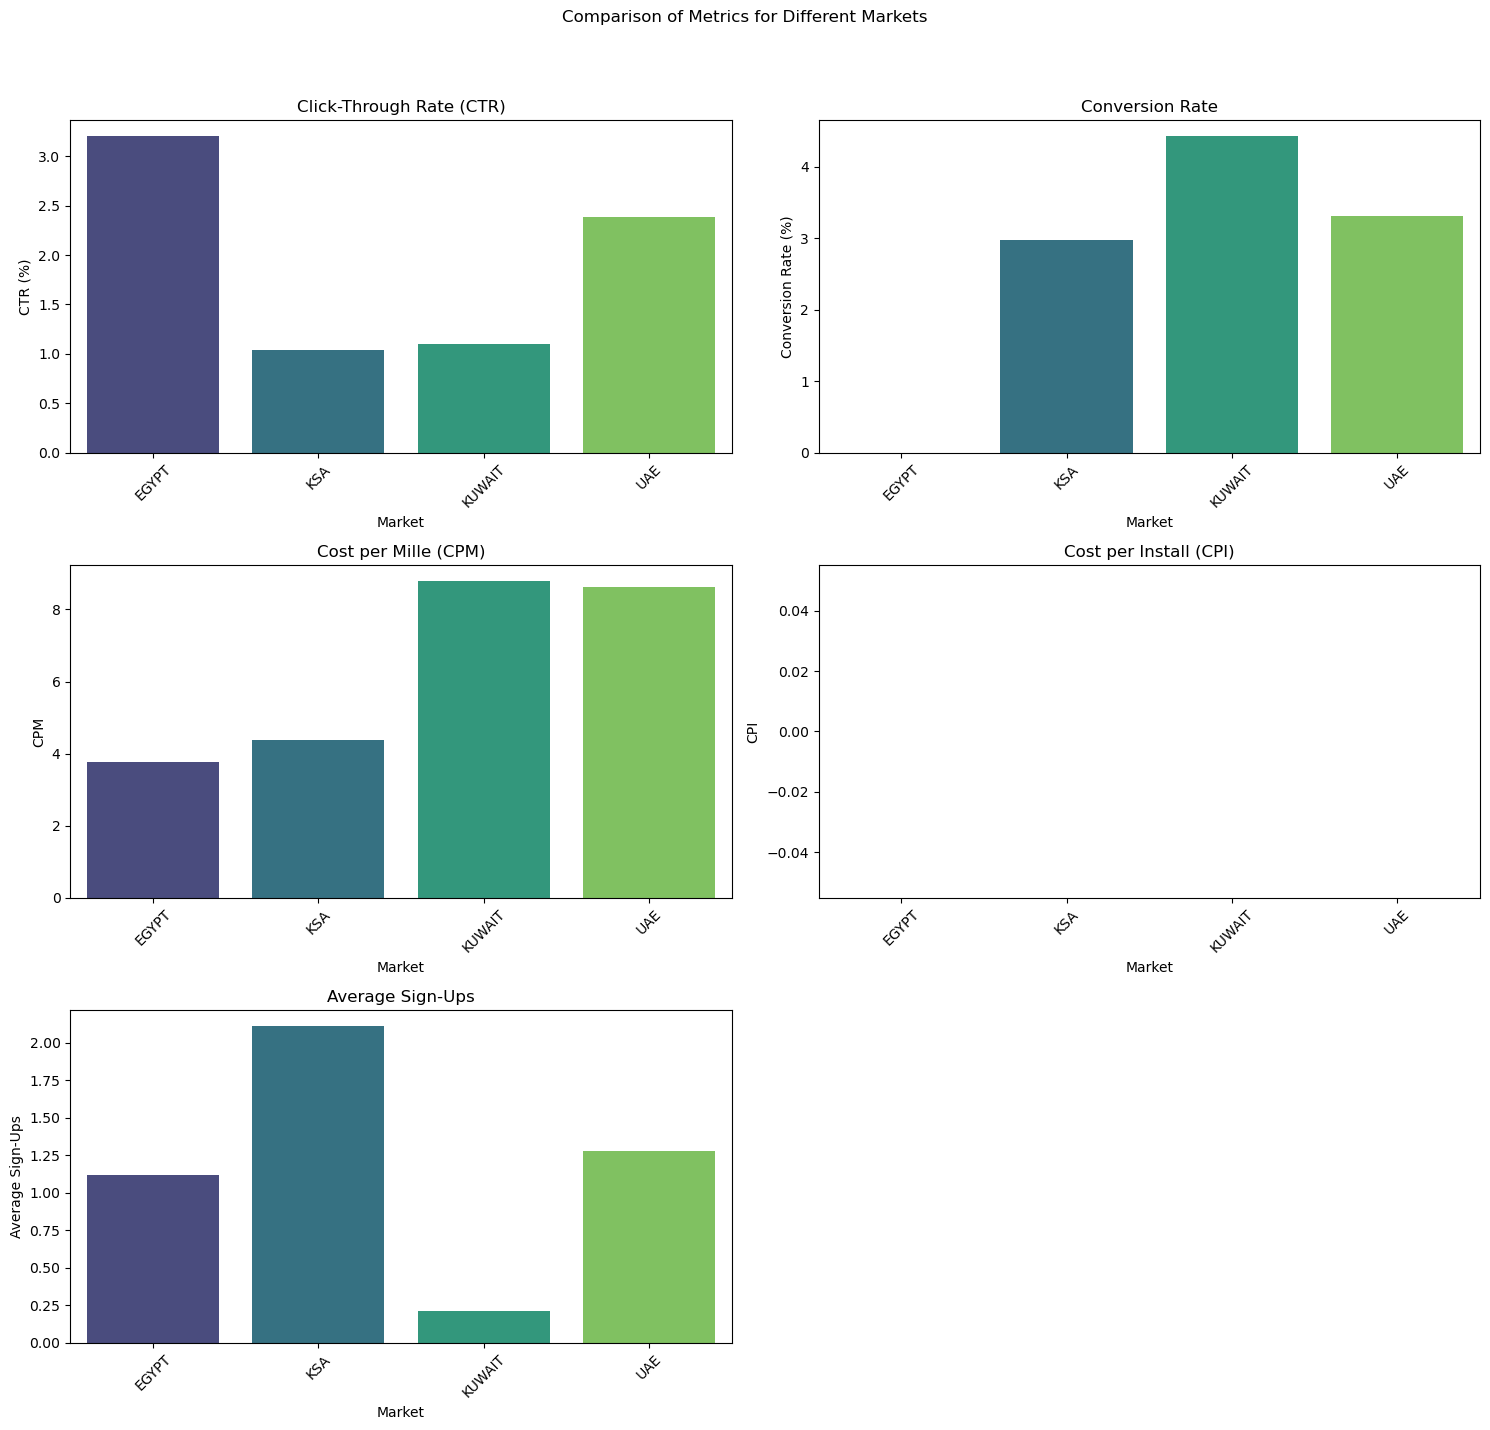

Market metrics exported to C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Market_Metrics.xlsx


In [9]:
############################################################################################################
###############################################################################################################
# QUESTION 7-3: Calculate the Mesure Metrics to test the Hypothesis :
###############################################################################################################

# Hypotheis 1: "Channel Effevtiveness"
# --> H1: Social Media Channels (Snapchat, Tiktok, Twitter) are more effective in driving conversion than Search channels ( Apple App Store, Apple Search, Facebook, Google Ads)
# --> H2: Search Channels are more effective in drinving conversion than Social Media channels.

# Hypothesis 2: "Platform Engagement"
# --> Campaigns run on Apple App Store result in higher metric measures than campaigns run on all the other platforms (Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter)
# --> Campaigns run on Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter result in higher metric measures than campaigns run on Apple App Store

# Hypothesis 3: "Market Performance"
# --> Campaigns targeted at UAE market generate higher converion and metric measure rates than campaigns targeted at the other markets (Egypt, KSA and Kuwait)
# --> Campaigns targeted at Egypt, KSA and Kuwait markets generate higher converion and metric measure rates than campaigns targeted at UAE




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the aggregated data from the saved file
input_file_path = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Merged_Cleaned_Splited_Aggregated Data.xlsx"
df = pd.read_excel(input_file_path)

# Verify unique values in 'Market'
print("Unique values in 'Market' before filtering:")
print(df['Market'].unique())

# Ensure consistent casing and strip any extra spaces
df['Market'] = df['Market'].str.strip().str.upper()

# Filter the data to include only the 4 markets
markets = ['EGYPT', 'KSA', 'KUWAIT', 'UAE']
filtered_df = df[df['Market'].isin(markets)]

# Check if filtering worked correctly
print("Unique values in 'Market' after filtering:")
print(filtered_df['Market'].unique())

# Calculate KPIs
filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
filtered_df['CPM'] = (filtered_df['Total Spends'] / filtered_df['Total Impressions']) * 1000
filtered_df['CPI'] = filtered_df['Total Spends'] / filtered_df['Total Installs']

# Group by Market and calculate mean KPIs
market_metrics = filtered_df.groupby('Market').agg({
    'CTR': 'mean',
    'Conversion Rate': 'mean',
    'CPM': 'mean',
    'CPI': 'mean',
    'Average Sign-Ups': 'mean'
}).reset_index()

print("Market Metrics:")
print(market_metrics)

# Visualize the metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Comparison of Metrics for Different Markets')

# Plot CTR
sns.barplot(ax=axes[0, 0], x='Market', y='CTR', data=market_metrics, palette='viridis')
axes[0, 0].set_title('Click-Through Rate (CTR)')
axes[0, 0].set_xlabel('Market')
axes[0, 0].set_ylabel('CTR (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Conversion Rate
sns.barplot(ax=axes[0, 1], x='Market', y='Conversion Rate', data=market_metrics, palette='viridis')
axes[0, 1].set_title('Conversion Rate')
axes[0, 1].set_xlabel('Market')
axes[0, 1].set_ylabel('Conversion Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot CPM
sns.barplot(ax=axes[1, 0], x='Market', y='CPM', data=market_metrics, palette='viridis')
axes[1, 0].set_title('Cost per Mille (CPM)')
axes[1, 0].set_xlabel('Market')
axes[1, 0].set_ylabel('CPM')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot CPI
sns.barplot(ax=axes[1, 1], x='Market', y='CPI', data=market_metrics, palette='viridis')
axes[1, 1].set_title('Cost per Install (CPI)')
axes[1, 1].set_xlabel('Market')
axes[1, 1].set_ylabel('CPI')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot Average Sign-Ups
sns.barplot(ax=axes[2, 0], x='Market', y='Average Sign-Ups', data=market_metrics, palette='viridis')
axes[2, 0].set_title('Average Sign-Ups')
axes[2, 0].set_xlabel('Market')
axes[2, 0].set_ylabel('Average Sign-Ups')
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the market metrics to a new Excel file
output_file_path_8 = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Market_Metrics.xlsx"
market_metrics.to_excel(output_file_path_8, index=False)
print(f"Market metrics exported to {output_file_path_8}")




Unique values in 'ProductType' before filtering:
[nan 'Kuwait' 'Personal Care' 'Skin Care' 'Hair Care' 'Conversion'
 'Awareness']
Unique values in 'ProductType' after filtering:
['personal care' 'skin care' 'hair care']
Product Metrics:
     ProductType       CTR  Conversion Rate       CPM  CPI  Average Sign-Ups
0      hair care  1.515193         2.597854  5.502064  inf          0.570394
1  personal care  1.441354         3.546423  7.059957  inf          1.835952
2      skin care  1.750976         3.577712  7.056283  inf          1.830359


C:\Users\User\AppData\Local\Temp\ipykernel_16564\3468286532.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_16564\3468286532.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
C:\Users\User\AppData\Local\Temp\ipykernel_16564\3468286532.py:51: SettingWithCopyWarning: 
A

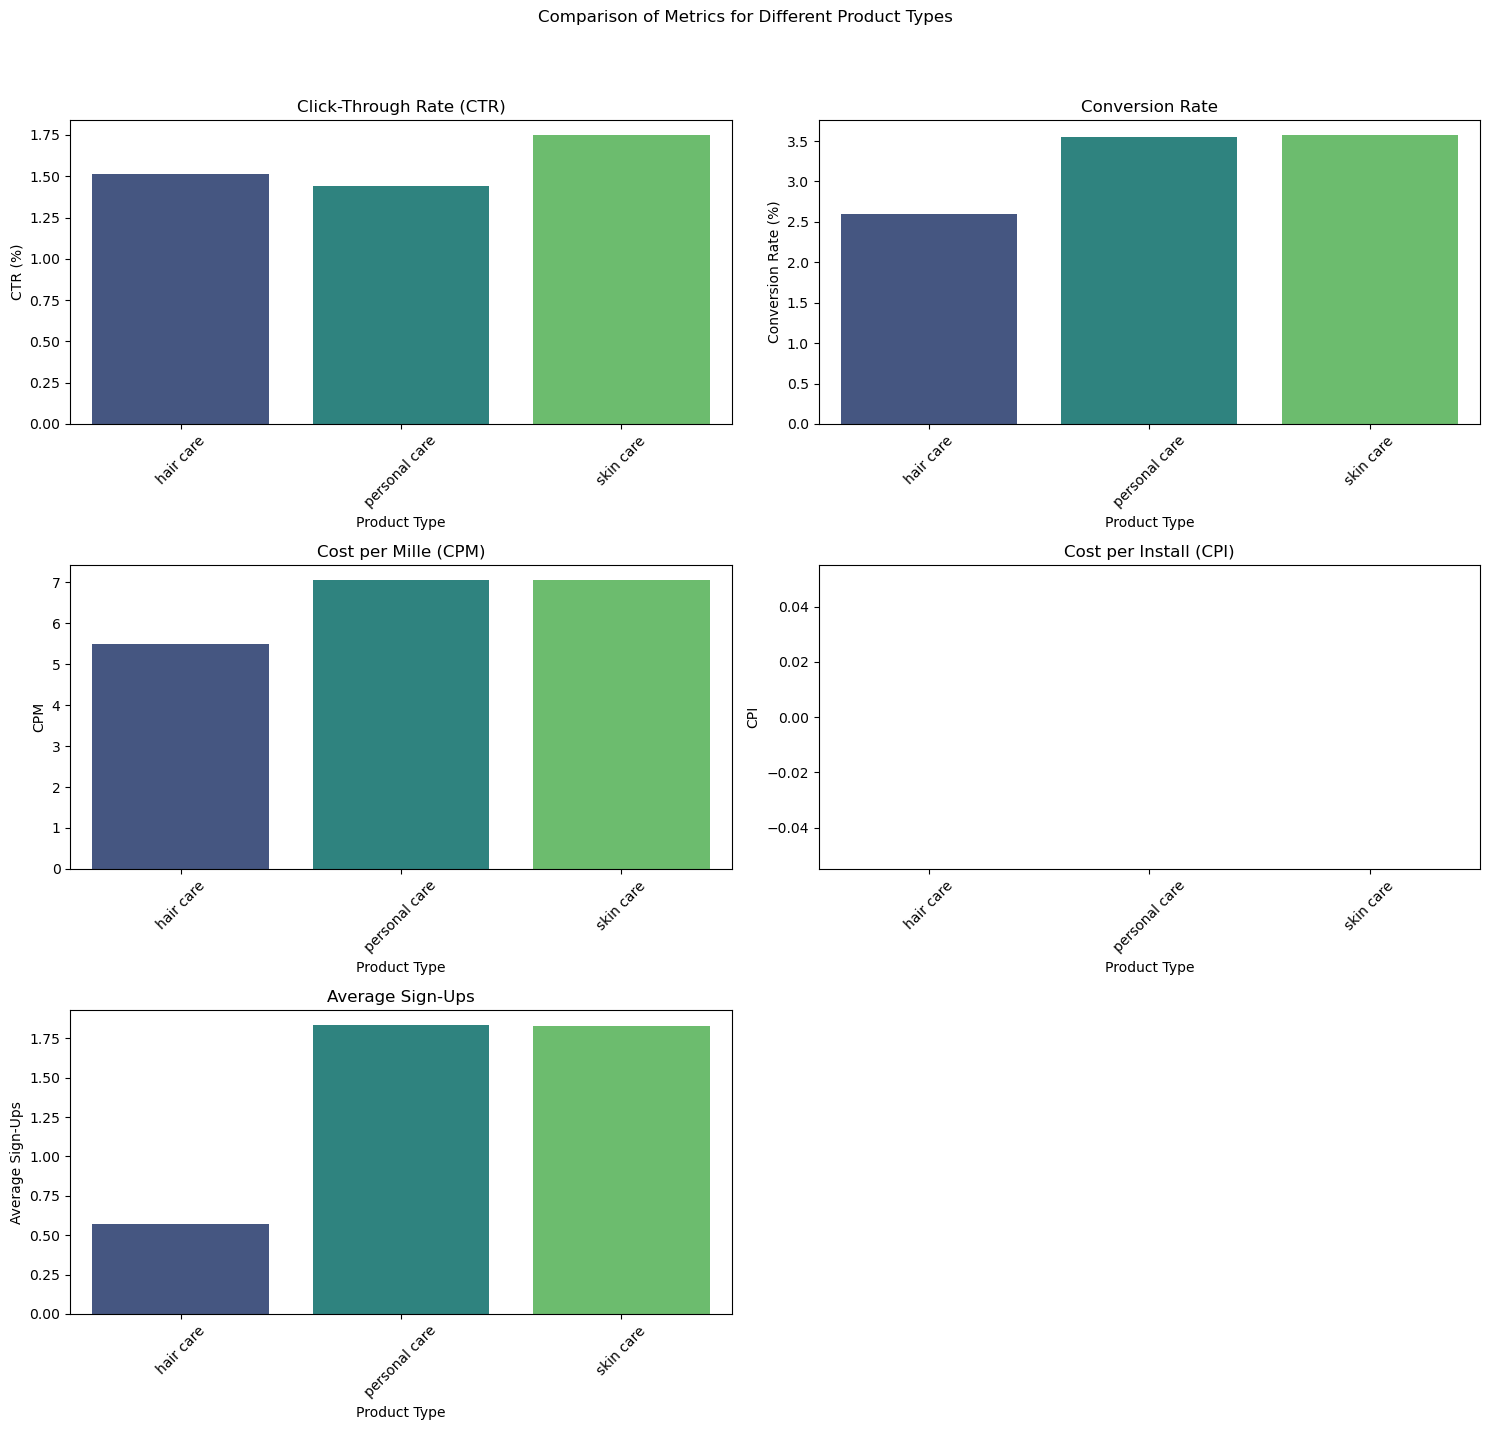

Product metrics exported to C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Product_Metrics.xlsx


In [11]:
############################################################################################################
###############################################################################################################
# QUESTION 7-4: Calculate the Mesure Metrics to test the Hypothesis :
###############################################################################################################

# Hypotheis 1: "Channel Effevtiveness"
# --> H1: Social Media Channels (Snapchat, Tiktok, Twitter) are more effective in driving conversion than Search channels ( Apple App Store, Apple Search, Facebook, Google Ads)
# --> H2: Search Channels are more effective in drinving conversion than Social Media channels.

# Hypothesis 2: "Platform Engagement"
# --> Campaigns run on Apple App Store result in higher metric measures than campaigns run on all the other platforms (Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter)
# --> Campaigns run on Apple Search, Facebook, Google Ads, Snapchat, Tiktok and Twitter result in higher metric measures than campaigns run on Apple App Store

# Hypothesis 3: "Market Performance"
# --> Campaigns targeted at UAE market generate higher converion and metric measure rates than campaigns targeted at the other markets (Egypt, KSA and Kuwait)
# --> Campaigns targeted at Egypt, KSA and Kuwait markets generate higher converion and metric measure rates than campaigns targeted at UAE

# Hypothesis 4: "Product Type Impact"
# --> Skin care product campaigns have higher engagement rates than Hair care and Personal Care
# --> Hair care and Personal care products have higher engagement rates than Skine Care




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the aggregated data from the saved file
input_file_path = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Merged_Cleaned_Splited_Aggregated Data.xlsx"
df = pd.read_excel(input_file_path)

# Verify unique values in 'ProductType'
print("Unique values in 'ProductType' before filtering:")
print(df['ProductType'].unique())

# Ensure consistent casing and strip any extra spaces
df['ProductType'] = df['ProductType'].str.strip().str.lower()

# Filter the data to include only the 3 products
products = ['hair care', 'personal care', 'skin care']
filtered_df = df[df['ProductType'].isin(products)]

# Check if filtering worked correctly
print("Unique values in 'ProductType' after filtering:")
print(filtered_df['ProductType'].unique())

# Calculate KPIs
filtered_df['CTR'] = (filtered_df['Total Clicks'] / filtered_df['Total Impressions']) * 100
filtered_df['Conversion Rate'] = (filtered_df['Total Installs'] / filtered_df['Total Clicks']) * 100
filtered_df['CPM'] = (filtered_df['Total Spends'] / filtered_df['Total Impressions']) * 1000
filtered_df['CPI'] = filtered_df['Total Spends'] / filtered_df['Total Installs']

# Group by ProductType and calculate mean KPIs
product_metrics = filtered_df.groupby('ProductType').agg({
    'CTR': 'mean',
    'Conversion Rate': 'mean',
    'CPM': 'mean',
    'CPI': 'mean',
    'Average Sign-Ups': 'mean'
}).reset_index()

print("Product Metrics:")
print(product_metrics)

# Visualize the metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Comparison of Metrics for Different Product Types')

# Plot CTR
sns.barplot(ax=axes[0, 0], x='ProductType', y='CTR', data=product_metrics, palette='viridis')
axes[0, 0].set_title('Click-Through Rate (CTR)')
axes[0, 0].set_xlabel('Product Type')
axes[0, 0].set_ylabel('CTR (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Conversion Rate
sns.barplot(ax=axes[0, 1], x='ProductType', y='Conversion Rate', data=product_metrics, palette='viridis')
axes[0, 1].set_title('Conversion Rate')
axes[0, 1].set_xlabel('Product Type')
axes[0, 1].set_ylabel('Conversion Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot CPM
sns.barplot(ax=axes[1, 0], x='ProductType', y='CPM', data=product_metrics, palette='viridis')
axes[1, 0].set_title('Cost per Mille (CPM)')
axes[1, 0].set_xlabel('Product Type')
axes[1, 0].set_ylabel('CPM')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot CPI
sns.barplot(ax=axes[1, 1], x='ProductType', y='CPI', data=product_metrics, palette='viridis')
axes[1, 1].set_title('Cost per Install (CPI)')
axes[1, 1].set_xlabel('Product Type')
axes[1, 1].set_ylabel('CPI')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot Average Sign-Ups
sns.barplot(ax=axes[2, 0], x='ProductType', y='Average Sign-Ups', data=product_metrics, palette='viridis')
axes[2, 0].set_title('Average Sign-Ups')
axes[2, 0].set_xlabel('Product Type')
axes[2, 0].set_ylabel('Average Sign-Ups')
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the product metrics to a new Excel file
output_file_path_9 = "C:/Users/User/Desktop/Elio's File/Data Analyst Assessment - Annalect/Elio's Assessment/Part 2 – Data Cleaning and Manipulation/Product_Metrics.xlsx"
product_metrics.to_excel(output_file_path_9, index=False)
print(f"Product metrics exported to {output_file_path_9}")
